## 

# SVMを用いた株価予測(初心者用)

株のトレードに人工知能を応用するなどのタスクには自然言語モデルや強化学習などのモデルが利用される。これらは理論をしっかりと勉強する必要があり、初心者がはじめに触れるには難しいものである.そこで、初学者でも簡単に触れることができる機械学習モデルを用いて株価データを学習させ特定の範囲の値を予測させる. (やっていることは深層学習モデルでのタスクとほぼ同じ)

**用いるデータセット**\
Yahoo Finance Appleの株価データ\
https://finance.yahoo.com/quote/AAPL/history?p=AAPL

In [68]:
#必要なライブラリーのimport
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [69]:
df = pd.read_csv("AAPL.csv")

In [70]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200
249,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400
250,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700
251,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100
252,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79302100


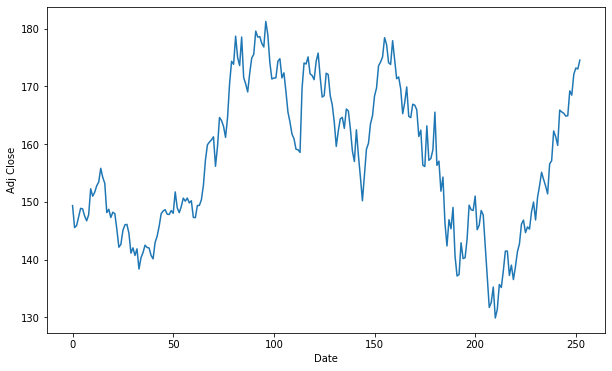

In [71]:
plt.figure(figsize=(10,6))
plt.plot(df['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

In [72]:
max = np.max(df['Adj Close'])

今回のタスクは、240番目までを学習データとして、241番目から252番目までをテストデータとして使用する

In [73]:
#学習データ
train = df.head(241)

#テストデータ
test = df.tail(12)

In [74]:
#train_x
train_x = []

for x in range(len(train)):
    train_x.append([x])

train_x = np.array(train_x)

In [75]:
#test_x
test_x = []
for x in range(len(test)):
    test_x.append([x+241])

test_x = np.array(test_x)

In [76]:
#train_y
train_y = train.loc[:,"Adj Close"]
train_y = train_y.to_numpy()

train_y.shape

(241,)

In [77]:
#test_y
test_y = test.loc[:,"Adj Close"]
test_y = test_y.to_numpy()

test_y.shape

(12,)

In [78]:
print("train_x ",train_x.shape)
print("test_x ",test_x.shape)
print("train_y ",train_y.shape)
print("test_y ",test_y.shape)

train_x  (241, 1)
test_x  (12, 1)
train_y  (241,)
test_y  (12,)


データの用意ができたので、モデルを作成する

In [79]:
rbf_svr = SVR(kernel="rbf", C=100,gamma=0.85)
rbf_svr.fit(train_x,train_y)

SVR(C=100, gamma=0.85)

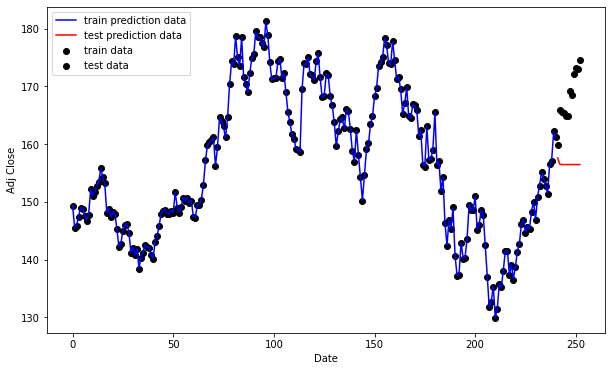

In [80]:
#plot model
plt.figure(figsize=(10,6))
plt.scatter(train_x,train_y,color='black',label='train data')
plt.scatter(test_x,test_y,color='black',label='test data')
plt.plot(train_x,rbf_svr.predict(train_x),color="blue",label="train prediction data")
plt.plot(test_x,rbf_svr.predict(test_x),color="red",label="test prediction data")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend()
plt.show()